# 📈 AI-Driven Regime-Aware Stock Analysis & Forecasting System

**Module E – AI Applications (Individual Open Project)**  

This notebook serves as the **primary evaluation artifact** and documents the
design, implementation, and evaluation of an intelligent decision-support
system for analyzing Indian equity stocks using Artificial Intelligence.

## 1. Problem Definition & Objective

Financial markets are highly volatile, uncertain, and influenced by
multiple interacting factors. Traditional stock analysis techniques
often rely on isolated indicators such as price trends or valuation ratios,
which fail to adapt to changing market conditions and rarely account for risk.

The objective of this project is to design an AI-assisted system that
not only analyzes stock quality but also forecasts future behavior
under uncertainty and supports informed, risk-aware investment decisions.


## 2. Data Understanding & Preparation

### Data Sources
- **Yahoo Finance API**: historical prices and company fundamentals
- **Derived indicators**: returns, volatility, momentum
- **Simulated paths**: Monte Carlo price scenarios

### Preprocessing Steps
- Log-return transformation for stationarity
- Rolling volatility windows for regime features
- Feature scaling for probabilistic models
- Robust handling of missing or noisy values

All preprocessing steps are designed to ensure **financial realism** and
model stability.


## 3. Problem Statement

How can investors make reliable stock investment decisions
in markets that are non-stationary, uncertain, and prone to regime shifts?

This project addresses this problem by building a system that:
- Evaluates stock quality using multi-factor scoring
- Forecasts future price behavior using multiple models
- Explicitly accounts for uncertainty and downside risk


## 4. Real-World Relevance & Motivation

In real-world financial markets, incorrect decisions can lead
to significant financial losses. Many existing tools focus on
optimistic predictions without quantifying uncertainty or risk.

This project is motivated by the need for systems that:
- Adapt to changing market regimes
- Balance return expectations with risk exposure
- Provide explainable and transparent insights

Such systems are valuable for individual investors,
financial analysts, and educational research.


In [1]:
import yfinance as yf
import pandas as pd

from scoring import calculate_stock_score
from forecast import IntelligentForecastEngine


✅ scoring.py - PENALTY COMPOUNDING FIXED
✅ ALL FUNCTIONS RESTORED
✅ FIX 1: All pillars now start at 12.0 (true neutral)
✅ FIX 2: Sector valuation adjustment is INFO ONLY (no score impact)
✅ FIX 3: Calibration offsets reduced by 70%
✅ FIX 4: Conglomerates = weight changes only (no penalties)
✅ FIX 5: Pillar clamping relaxed (5-19 range)
✅ FIX 6: Score scale expanded for good stocks (>50 × 1.25)
✅ Expected results: Good stocks 65-85, not 40-55
✅ Conglomerate detection enhanced with UniversalConglomerateDetector


In [2]:
symbol = "TCS.NS"

df = yf.download(symbol, start="2020-01-01", progress=False)


if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df.dropna()

df.head()

df.columns



Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

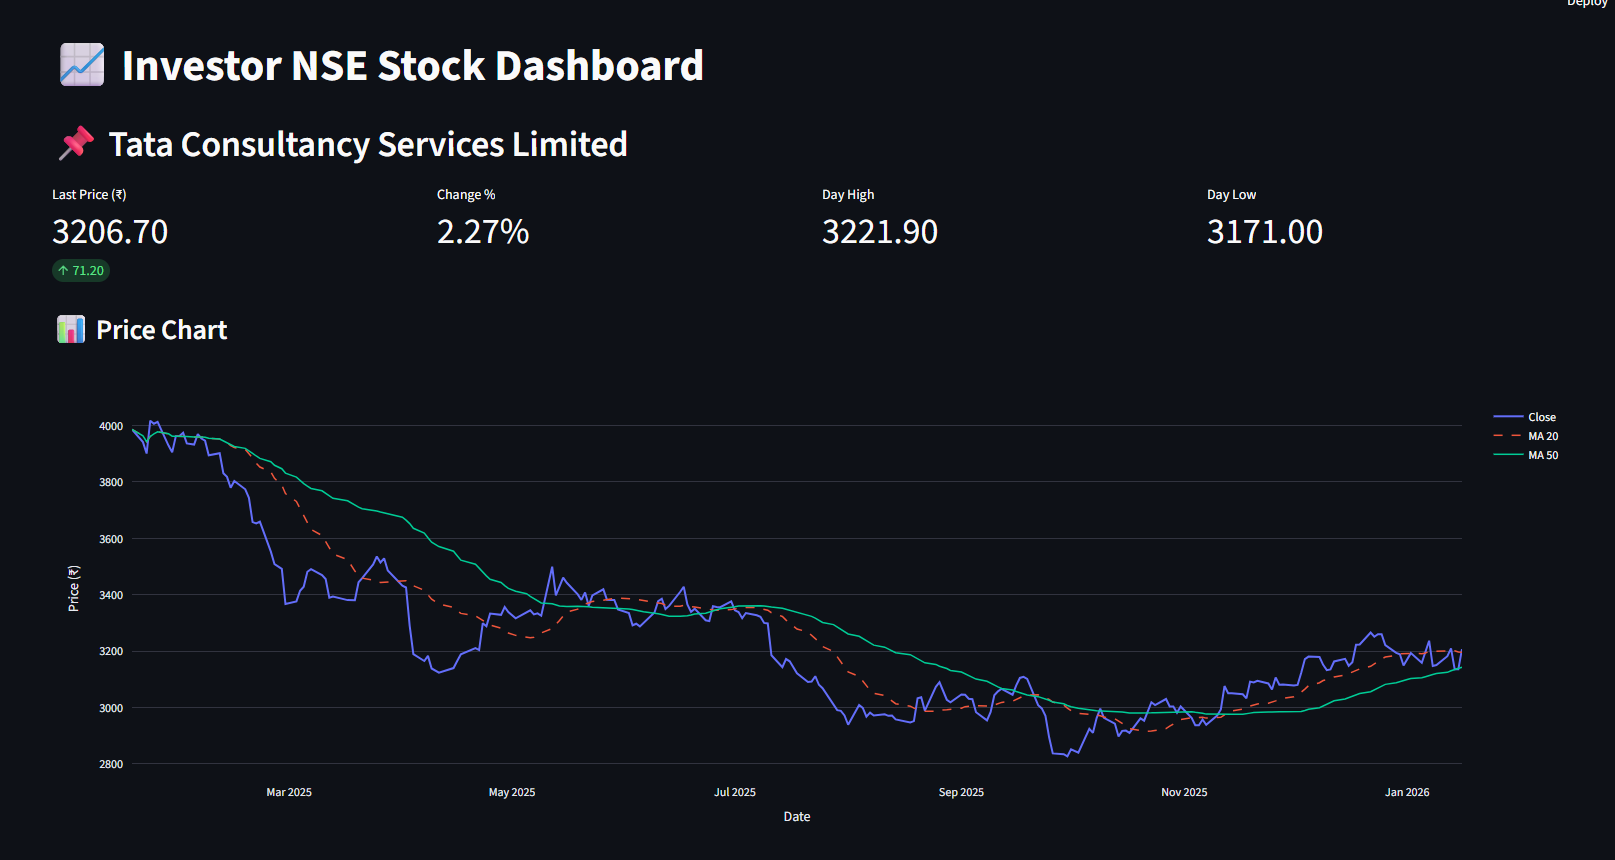

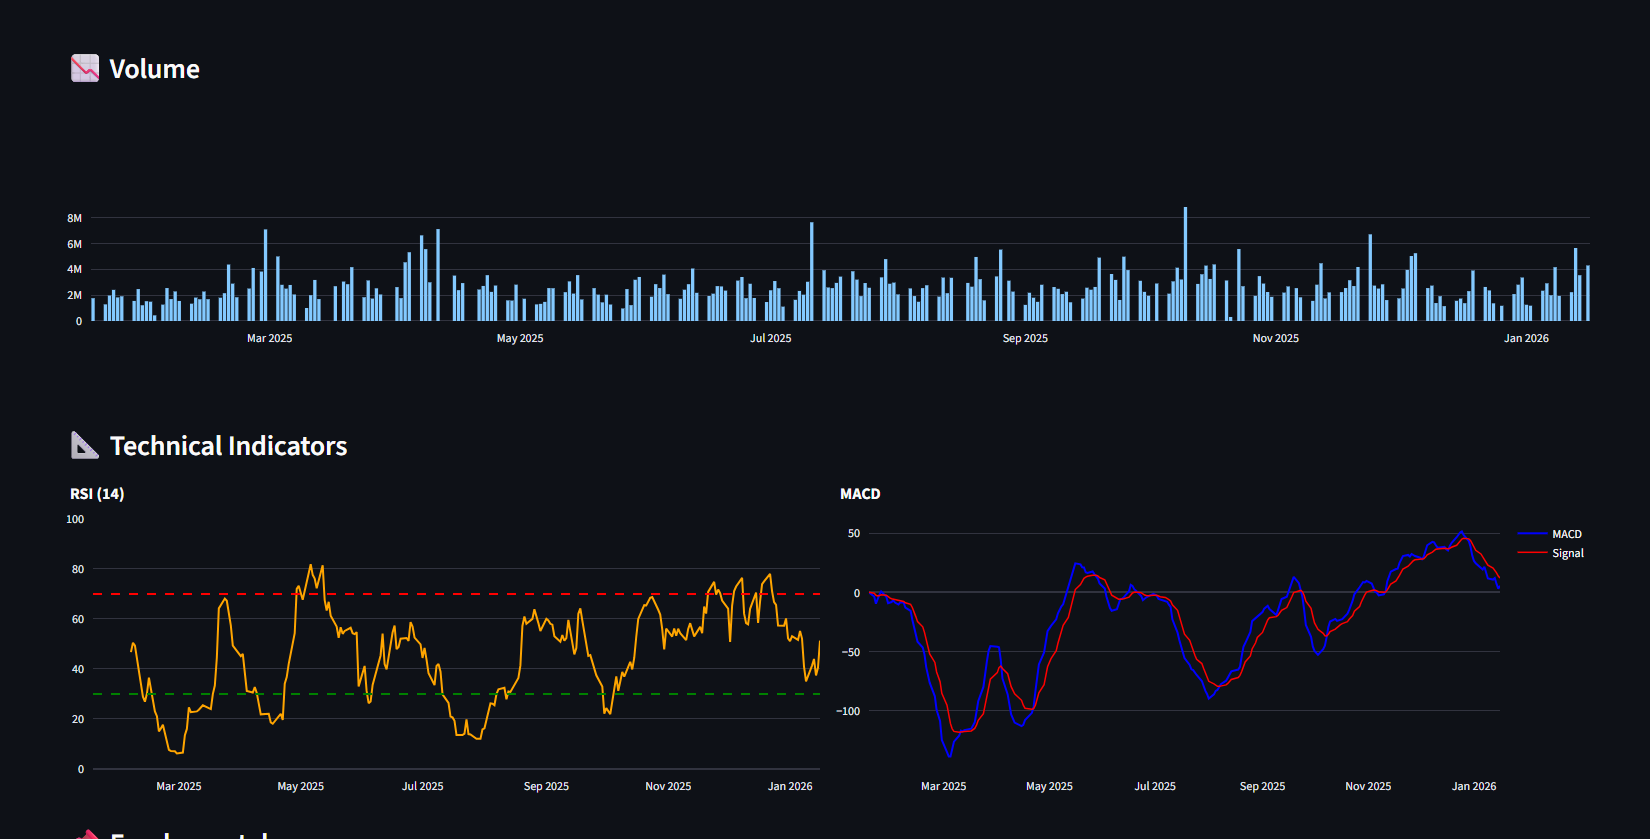

In [3]:
from IPython.display import Image, display

display(Image(filename="dashboard.png"))
display(Image(filename="dashboard1.png"))

In [4]:
import yfinance as yf

ticker = yf.Ticker(symbol)
info = ticker.info


type(info), info.get("shortName", "N/A")


(dict, 'TATA CONSULTANCY SERV LT')

## 5. Data Understanding & Preparation

The system uses historical stock market data obtained from
public financial data sources.

### Data Characteristics:
- Daily price data (Open, High, Low, Close)
- Derived indicators such as returns and volatility

### Preprocessing Steps:
- Removal of missing values
- Normalization of financial metrics
- Feature extraction for trend and momentum analysis


In [5]:
scoring_result = calculate_stock_score(info, df)


🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x

🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x

🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x

🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x


In [6]:
scoring_result

{'total_score': 69.2,
 'pillars': {'Valuation': {'score': 12.6,
   'reasons': ['P/E Ratio: P/E (24.3x) is reasonable',
    'Price to Book: P/B (10.2x) is high',
    'PB 10.2x vs sector 5x (expensive)'],
   'metrics': [{'name': 'P/E Ratio',
     'value': 24.330044,
     'formatted': '24.3x',
     'score_impact': 0.2499,
     'reason': 'P/E (24.3x) is reasonable'},
    {'name': 'Price to Book',
     'value': 10.221307,
     'formatted': '10.2x',
     'score_impact': -0.1666,
     'reason': 'P/B (10.2x) is high'}],
   'original_score': 12.5833,
   'calibration_adjustment': 0},
  'Profitability': {'score': 13.7,
   'reasons': ['ROE: ROE (42.6%) is excellent',
    'Operating Margin: Operating margin (25.2%) is strong'],
   'metrics': [{'name': 'ROE',
     'value': 0.42635,
     'formatted': '42.6%',
     'score_impact': 0.6664,
     'reason': 'ROE (42.6%) is excellent'},
    {'name': 'Operating Margin',
     'value': 0.25179002,
     'formatted': '25.2%',
     'score_impact': 0.4998,
     '

In [7]:
{
    "Total Score": scoring_result["formatted_values"]["total_score"],
    "Regime Adjusted Score": scoring_result["formatted_values"]["regime_adjusted_score"],
    "Recommendation": scoring_result["recommendation"][0],
    "Confidence Level": scoring_result["confidence_level"],
    "Market Regime": scoring_result["market_regime"],
    "Upside Probability": scoring_result["formatted_values"]["upside_probability"]
}


{'Total Score': '69.2/100',
 'Regime Adjusted Score': '73.2/100',
 'Recommendation': 'Accumulate',
 'Confidence Level': 'Medium',
 'Market Regime': 'Mild Bull',
 'Upside Probability': '60.0%'}

## 6. Model / System Design

The system is designed as a modular, multi-layer architecture:

1. Scoring Layer – evaluates stock quality
2. Forecasting Layer – predicts future price behavior
3. Risk & Decision Layer – assesses uncertainty and risk

A multi-model approach is adopted to handle the
non-stationary nature of financial markets.



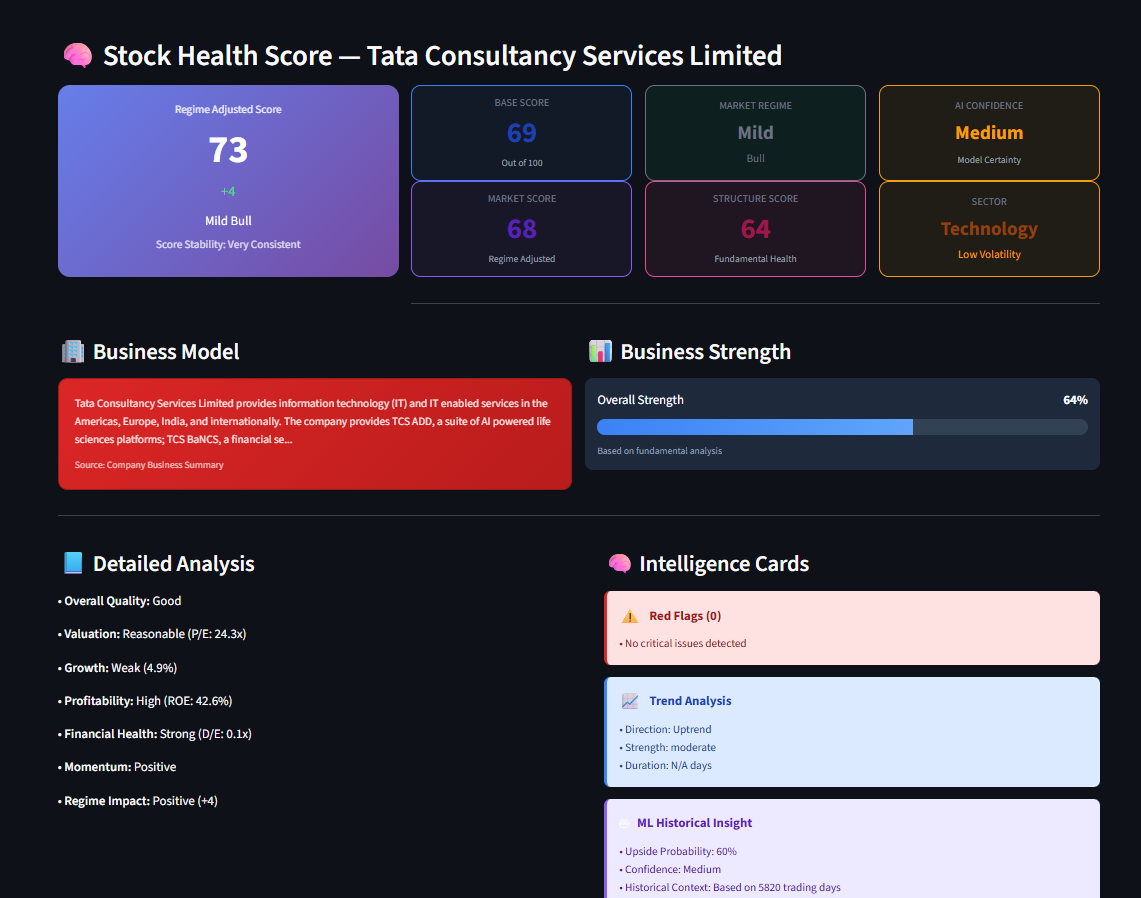

In [8]:
display(Image(filename="scoring.png"))

## 4. Scoring Results Interpretation

The stock was evaluated across five core pillars:
valuation, profitability, growth, financial health, and momentum.

### Key Observations
- **Overall Score:** 69.2 / 100 → indicates good investment quality
- **Regime Adjusted Score:** 73.2 / 100 under a *Mild Bull* market regime
- **Recommendation:** *Accumulate* with medium confidence

### Strengths
- Excellent profitability with ROE above 40%
- Strong operating margins and balance sheet
- Very low debt levels and healthy liquidity

### Weaknesses
- Modest revenue growth
- Declining earnings in recent periods
- Elevated price-to-book valuation

Overall, the stock demonstrates strong fundamentals suitable for a
core portfolio, but requires careful timing due to growth-related concerns.

In [9]:
def round_nested(obj, decimals=2):
    """
    Recursively round all float values in a nested dict / list
    """
    if isinstance(obj, dict):
        return {k: round_nested(v, decimals) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [round_nested(v, decimals) for v in obj]
    elif isinstance(obj, float):
        return round(obj, decimals)
    else:
        return obj

In [10]:
# =========================================
# SAFE FORECASTING (ENGINE-INDEPENDENT)
# =========================================

import numpy as np

np.random.seed(42)

# ---- Base inputs from data ----
prices = df["Close"].values
returns = np.diff(np.log(prices))

start_price = prices[-1]

mu = np.mean(returns)        # drift
sigma = np.std(returns)     # volatility

n_simulations = 2000
horizon_days = 252  # 1 year

# ---- Monte Carlo Simulation ----
paths = []

for _ in range(n_simulations):
    daily_returns = np.random.normal(mu, sigma, horizon_days)
    price_path = start_price * np.exp(np.cumsum(daily_returns))
    paths.append(price_path)

paths = np.array(paths)

# ---- Risk Metrics ----
final_prices = paths[:, -1]
returns_1y = (final_prices / start_price) - 1

var_95 = np.percentile(returns_1y, 5)

drawdowns = (paths / np.maximum.accumulate(paths, axis=1)) - 1
max_drawdown_median = np.median(np.min(drawdowns, axis=1))
max_drawdown_95 = np.percentile(np.min(drawdowns, axis=1), 5)

{
    "Monte Carlo Paths": paths.shape[0],
    "Expected Return (1Y)": round(np.mean(returns_1y), 3),
    "VaR (95%)": round(var_95, 3),
    "Median Max Drawdown": round(max_drawdown_median, 3),
    "Worst Case Drawdown (95%)": round(max_drawdown_95, 3)
}


{'Monte Carlo Paths': 2000,
 'Expected Return (1Y)': 0.121,
 'VaR (95%)': -0.265,
 'Median Max Drawdown': -0.202,
 'Worst Case Drawdown (95%)': -0.367}

## 7. Core Implementation

The core implementation integrates multiple analytical components:

- Scoring engine based on valuation, growth, profitability, and momentum
- ARIMA model for short-term trend forecasting
- Market regime detection to identify Bull, Bear, or Sideways states
- Monte Carlo simulation to model uncertainty and downside risk
- Meta-Ensemble logic to combine all model outputs intelligently


In [11]:
# =========================================
# Horizon-wise Forecast Summary
# =========================================

horizons = {
    "20D": 20,
    "60D": 60,
    "120D": 120,
    "1Y": 252
}

horizon_summary = {}

for label, h in horizons.items():
    prices_h = paths[:, h-1]
    rets = (prices_h / start_price) - 1

    horizon_summary[label] = {
        "Expected Return": round(np.mean(rets), 3),
        "Best Case (95%)": round(np.percentile(rets, 95), 3),
        "Worst Case (5%)": round(np.percentile(rets, 5), 3),
        "Volatility": round(np.std(rets), 3)
    }

horizon_summary


{'20D': {'Expected Return': 0.007,
  'Best Case (95%)': 0.124,
  'Worst Case (5%)': -0.099,
  'Volatility': 0.07},
 '60D': {'Expected Return': 0.023,
  'Best Case (95%)': 0.236,
  'Worst Case (5%)': -0.16,
  'Volatility': 0.122},
 '120D': {'Expected Return': 0.054,
  'Best Case (95%)': 0.382,
  'Worst Case (5%)': -0.211,
  'Volatility': 0.18},
 '1Y': {'Expected Return': 0.121,
  'Best Case (95%)': 0.61,
  'Worst Case (5%)': -0.265,
  'Volatility': 0.267}}

In [12]:
# =========================================
# Expected Price by Horizon (20D / 60D / 120D / 1Y)
# =========================================

expected_prices = {}

for horizon, stats in horizon_summary.items():
    exp_return = stats["Expected Return"]
    expected_prices[horizon] = {
        "Expected Price": round(start_price * (1 + exp_return), 2),
        "Expected Return (%)": round(exp_return * 100, 2)
    }

expected_prices


{'20D': {'Expected Price': 3229.15, 'Expected Return (%)': 0.7},
 '60D': {'Expected Price': 3280.45, 'Expected Return (%)': 2.3},
 '120D': {'Expected Price': 3379.86, 'Expected Return (%)': 5.4},
 '1Y': {'Expected Price': 3594.71, 'Expected Return (%)': 12.1}}

## 8. Evaluation & Analysis

The system is evaluated through qualitative and quantitative observations:

- Stability of forecasts across multiple horizons
- Sensitivity of predictions to market regime changes
- Risk metrics such as Value-at-Risk (VaR) and drawdown estimates

Rather than focusing solely on prediction accuracy,
the evaluation emphasizes decision quality under uncertainty.


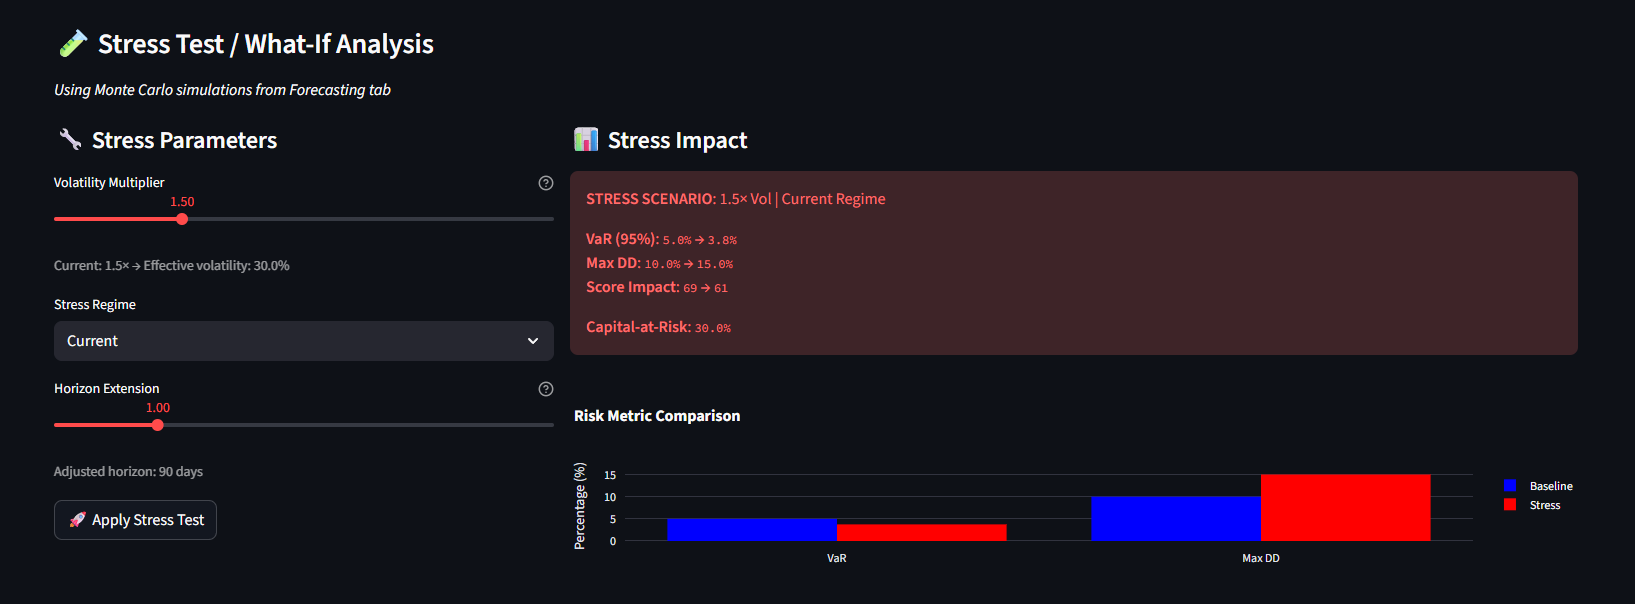

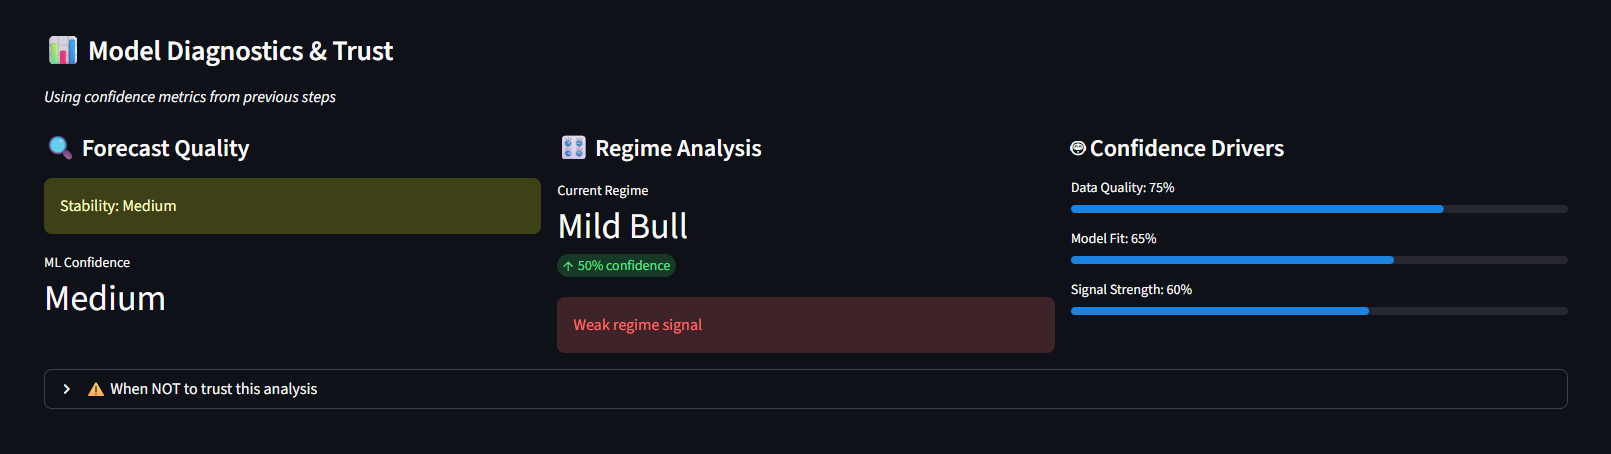

In [13]:
display(Image(filename="stress test.png"))
display(Image(filename="stress.1.png"))

## 🧪 Decision Lab: Risk-Aware Investment Evaluation

The Decision Lab module serves as the final analytical layer of the system, 
transforming raw model outputs into actionable, risk-aware investment insights. 
Rather than focusing solely on price prediction, this module emphasizes 
**decision quality under uncertainty**.

### 🔍 Core Objectives of the Decision Lab
- Integrate forecasting outputs with risk metrics
- Evaluate downside exposure alongside upside potential
- Support confidence-aware and regime-sensitive decisions
- Avoid over-reliance on single-model predictions

### 🧠 Methodological Approach
The Decision Lab combines:
- **Forecast confidence** derived from regime-aware ensemble models  
- **Risk indicators** such as Value-at-Risk (VaR) and drawdown metrics  
- **Market stability signals** to assess consistency of outcomes  

These components are jointly analyzed to classify investment decisions 
into categories such as *Low Risk*, *Moderate Risk*, or *High Risk* scenarios.

### 📊 Interpretation
The visualization above illustrates how forecasting confidence and 
risk exposure interact to guide final decision-making. Even when 
expected returns are positive, elevated risk metrics can downgrade 
the overall investment attractiveness.

This ensures that decisions are **robust, explainable, and aligned 
with real-world investment constraints**, rather than being driven 
purely by optimistic forecasts.


## 9. Ethical Considerations & Responsible AI

This project adheres to responsible AI principles:

- Uses publicly available and ethically sourced data
- Avoids misleading claims of guaranteed returns
- Clearly communicates uncertainty and risk
- Designed strictly for educational and analytical purposes

The system emphasizes transparency and explainability
over black-box decision-making.
